Credits/Course URL: https://www.udemy.com/course/machinelearning/

## Logistic Regression Classifier

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions

#### Reading the data

In [37]:
data = pd.read_csv(r'E:\Github\Datasets\Social_Network_Ads.csv')

In [38]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### Data Exploration

In [39]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


<AxesSubplot: xlabel='Age', ylabel='Count'>

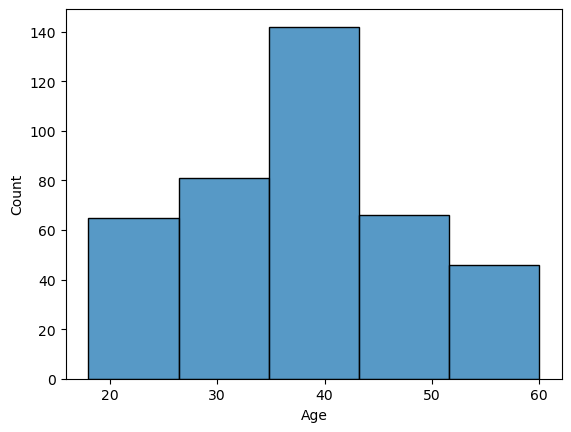

In [41]:
sns.histplot(x = 'Age', data = data, bins = 5)

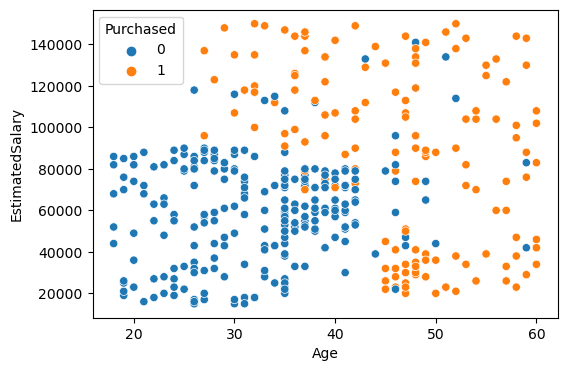

In [42]:
plt.figure(figsize=(6,4))
sns.scatterplot(x = 'Age', y = 'EstimatedSalary', hue = 'Purchased', data = data);

#### Splitting the dataset

In [43]:
X = data.drop('Purchased', axis = 1).values
y = data['Purchased'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
X_train[:5]

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000]], dtype=int64)

In [46]:
X_test[:5]

array([[   30, 87000],
       [   38, 50000],
       [   35, 75000],
       [   30, 79000],
       [   35, 50000]], dtype=int64)

In [47]:
X_train.shape, y_train.shape

((320, 2), (320,))

In [48]:
X_test.shape, y_test.shape

((80, 2), (80,))

#### Feature Scaling

In [49]:
scaler = StandardScaler()

In [50]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train[:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [52]:
X_test[:5]

array([[-0.79895082,  0.49460758],
       [-0.02126485, -0.57735906],
       [-0.31289709,  0.14694273],
       [-0.79895082,  0.26283101],
       [-0.31289709, -0.57735906]])

#### Building Naive Bayes Classifier

In [53]:
gnb_classifier = GaussianNB()

In [54]:
gnb_classifier.fit(X_train, y_train)

GaussianNB()

In [55]:
y_pred_train = gnb_classifier.predict(X_train)
y_pred_test = gnb_classifier.predict(X_test)

In [56]:
actual_pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
actual_pred_df.head(7)

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0


#### Classification Metrics on obtained results

In [57]:
print('\n **************** Classification Report - Training Data **************** \n')
print(classification_report(y_train, y_pred_train))


 **************** Classification Report - Training Data **************** 

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       199
           1       0.86      0.83      0.84       121

    accuracy                           0.88       320
   macro avg       0.88      0.87      0.88       320
weighted avg       0.88      0.88      0.88       320




 **************** Confusion Martix - Training Data **************** 



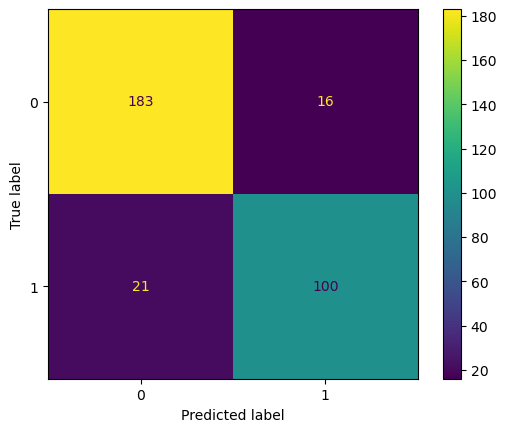

In [58]:
print('\n **************** Confusion Martix - Training Data **************** \n')
cm = confusion_matrix(y_train, y_pred_train, labels=gnb_classifier.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

In [59]:
tn, fp, fn, tp = cm.ravel()

print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")

True Negative: 183
False Positive: 16
False Negative: 21
True Positive: 100


In [60]:
print('\n **************** Classification Report - Training Data **************** \n')
print(classification_report(y_test, y_pred_test))


 **************** Classification Report - Training Data **************** 

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.86      0.82      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.91      0.91      0.91        80




 **************** Confusion Martix - Training Data **************** 



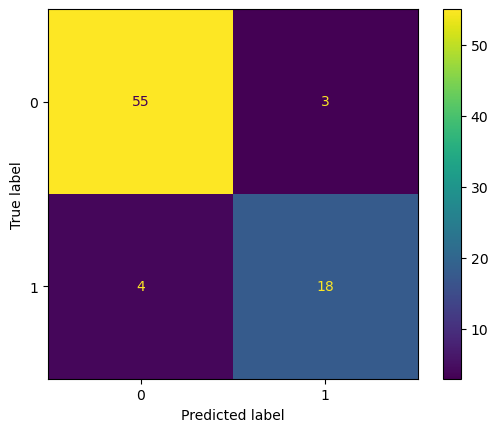

In [61]:
print('\n **************** Confusion Martix - Training Data **************** \n')
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show();

#### Plotting decision regions

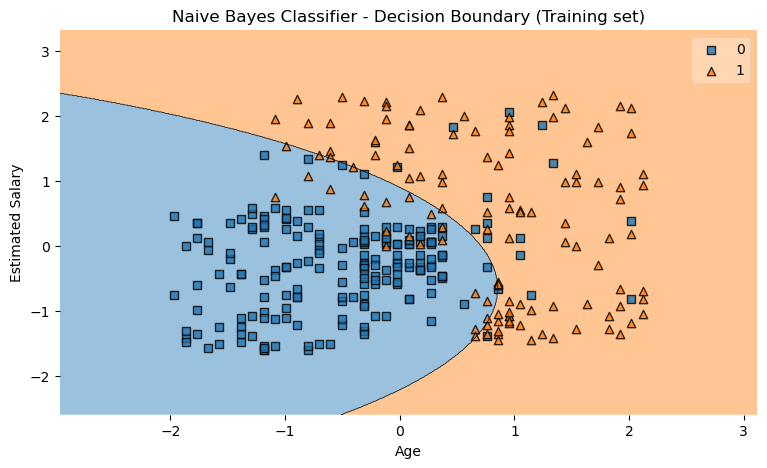

In [62]:
plt.figure(figsize=(9,5))

plot_decision_regions(X_train, y_train, 
                      clf=gnb_classifier, 
                      legend=1, 
                      X_highlight=None)

# Adding axes annotations
plt.title('Naive Bayes Classifier - Decision Boundary (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
#plt.legend()
plt.show();

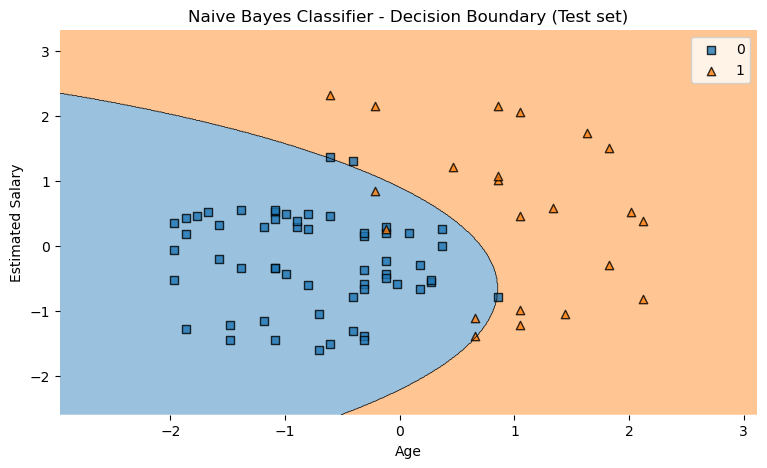

In [63]:
plt.figure(figsize=(9,5))

plot_decision_regions(X_test, y_test, 
                      clf=gnb_classifier, 
                      legend=1, 
                      X_highlight=None)

plt.title('Naive Bayes Classifier - Decision Boundary (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()